In [2]:
import pyccl as ccl
import numpy as np
import pylab as pl
#from astropy.cosmology import Planck18 as cosmo
from scipy import interpolate
import pickle
from scipy.integrate import quad, dblquad
import math
import sys
sys.path.insert(0, "/global/homes/q/qhang/desi/lya/codes/")
import lya_utils as lu

# Generate model

### 20 z-bins, $\theta=[10,30]$, $\alpha=0$

In [29]:
! python /global/homes/q/qhang/desi/lya/codes/generate_model_for_inference.py -sim_num 0 -outroot /pscratch/sd/q/qhang/desi-lya/results-newbias/ -linear 1 -unknown_bg 0 -theta 10 30 10 -alpha 0 -zbins 2 3 20 -yaw_tag 20bin -zgrid 1.8 3.0 100





2.025
2.075
2.125
2.175
2.225
2.275
2.325
2.375
2.425
2.475
2.525
2.575
2.625
2.675
2.725
2.775
2.825
2.875
2.925
2.975
saved files with prefix /pscratch/sd/q/qhang/desi-lya/results-newbias/run-0/yaw-20bin/inference/model/wsp_int_known_bg_linear_theta_10_30


In [30]:
! python /global/homes/q/qhang/desi/lya/codes/generate_model_for_inference.py -sim_num 0 -outroot /pscratch/sd/q/qhang/desi-lya/results-newbias/ -linear 1 -unknown_bg 1 -theta 10 30 10 -alpha 0 -zbins 2 3 20 -yaw_tag 20bin -zgrid 1.8 3.0 100





2.025
2.075
2.125
2.175
2.225
2.275
2.325
2.375
2.425
2.475
2.525
2.575
2.625
2.675
2.725
2.775
2.825
2.875
2.925
2.975
saved files with prefix /pscratch/sd/q/qhang/desi-lya/results-newbias/run-0/yaw-20bin/inference/model/wsp_int_unknown_bg_linear_theta_10_30


### 20 z-bins, $\theta=[1,50]$, with mask limit to $[23,50]$, $\alpha=0$, zgrid = [1.8,3.0]

In [31]:
! python /global/homes/q/qhang/desi/lya/codes/generate_model_for_inference.py -sim_num 0 -outroot /pscratch/sd/q/qhang/desi-lya/results-newbias/ -linear 1 -unknown_bg 0 -theta 1 50 15 -theta_mask 22 51 -alpha 0 -zbins 2 3 20 -yaw_tag 20bin -zgrid 1.8 3.0 100





2.025
2.075
2.125
2.175
2.225
2.275
2.325
2.375
2.425
2.475
2.525
2.575
2.625
2.675
2.725
2.775
2.825
2.875
2.925
2.975
saved files with prefix /pscratch/sd/q/qhang/desi-lya/results-newbias/run-0/yaw-20bin/inference/model/wsp_int_known_bg_linear_theta_23_50


# check results of the inference

In [1]:
import emcee

20 bins, shift model

In [18]:
# let's load back the chains run on nersc:
filename = "/pscratch/sd/q/qhang/desi-lya/results-newbias/run-0/yaw-20bin/inference/chains/"
filename += "wsp_int_known_bg_linear_theta_10_30.shift_model.chain.h5"
reader = emcee.backends.HDFBackend(filename)

tau = reader.get_autocorr_time()
print(tau)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
samples = reader.get_chain(flat=True,discard=burnin,thin=thin)
log_prob_samples = reader.get_log_prob(flat=True,discard=burnin,thin=thin)
log_prior_samples = reader.get_blobs(flat=True,discard=burnin,thin=thin)

print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))
print("flat log prior shape: {0}".format(log_prior_samples.shape))

[25.37213861]
burn-in: 50
thin: 12
flat chain shape: (7840, 1)
flat log prob shape: (7840,)


AttributeError: 'NoneType' object has no attribute 'shape'

Text(0, 0.5, '$p(\\delta_z)$')

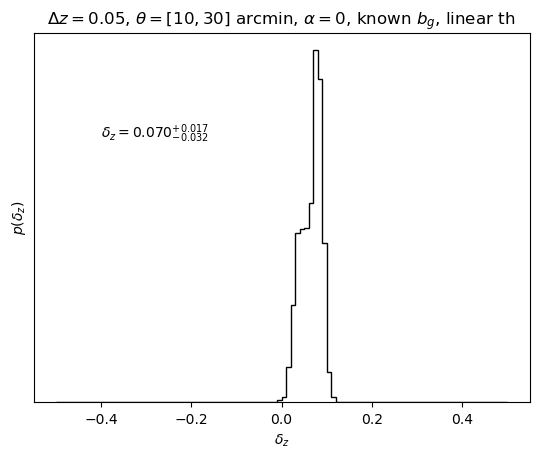

In [19]:
pl.hist(samples[:, 0], 100, range=[-0.5,0.5], color="k", histtype="step", label="linear theory")
mcmc = np.percentile(samples[:, 0], [16, 50, 84])
q = np.diff(mcmc)
txt = "$ \\delta_z = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}$"
txt = txt.format(mcmc[1], q[0], q[1])
pl.text(-0.4, 1200, txt)
pl.title("$\\Delta z = 0.05$, $\\theta=[10,30]$ arcmin, $\\alpha=0$, known $b_g$, linear th")
pl.xlabel("$\\delta_z$")
pl.yticks([])
pl.ylabel("$p(\\delta_z)$")

In [15]:
# let's load back the chains run on nersc:
filename = "/pscratch/sd/q/qhang/desi-lya/results-newbias/run-0/yaw-20bin/inference/chains/"
filename += "wsp_int_known_bg_linear_theta_23_50.shift_model.chain.h5"
reader = emcee.backends.HDFBackend(filename)

tau = reader.get_autocorr_time()
print(tau)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
samples = reader.get_chain(flat=True,discard=burnin,thin=thin)
log_prob_samples = reader.get_log_prob(flat=True,discard=burnin,thin=thin)
log_prior_samples = reader.get_blobs(flat=True,discard=burnin,thin=thin)

print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))
print("flat log prior shape: {0}".format(log_prior_samples.shape))

[28.89465148]
burn-in: 57
thin: 14
flat chain shape: (6720, 1)
flat log prob shape: (6720,)


AttributeError: 'NoneType' object has no attribute 'shape'

Text(0, 0.5, '$p(\\delta_z)$')

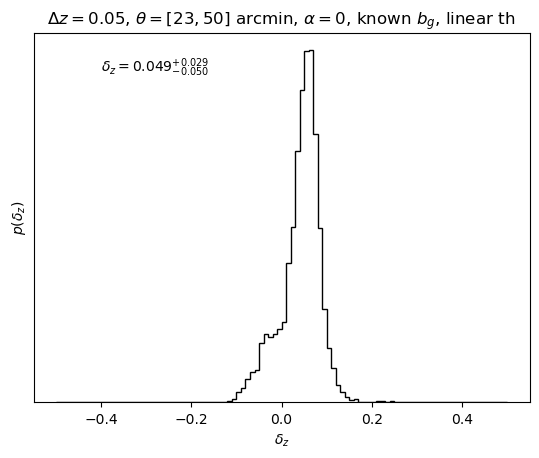

In [17]:
pl.hist(samples[:, 0], 100, range=[-0.5,0.5], color="k", histtype="step", label="linear theory")
mcmc = np.percentile(samples[:, 0], [16, 50, 84])
q = np.diff(mcmc)
txt = "$ \\delta_z = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}$"
txt = txt.format(mcmc[1], q[0], q[1])
pl.text(-0.4, 800, txt)
pl.title("$\\Delta z = 0.05$, $\\theta=[23,50]$ arcmin, $\\alpha=0$, known $b_g$, linear th")
pl.xlabel("$\\delta_z$")
pl.yticks([])
pl.ylabel("$p(\\delta_z)$")